In [1]:
yaml_content = """
train: /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images
val: /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/valid/images
test: /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/test/images

nc: 10
names: ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

"""

# Save YAML
with open("data.yaml", "w") as f:
    f.write(yaml_content)


In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.2 MB/s eta 0:00:00:00:0100:01


In [4]:
from ultralytics import YOLO

# Load the YOLOv8s model
model = YOLO("yolov8s.pt")

# Train the model
results = model.train(
    data="/kaggle/working/data.yaml",        # Path to your dataset YAML
    epochs=100,               # Number of training epochs
    imgsz=640,               # Image size
    batch=16,                # Batch size (adjust based on GPU memory)
    workers=2,               # Number of dataloader workers            
    project="ppe_detection", # Project name (saved in /kaggle/working/ppe_detection)
    name="yolov8s_v1",       # Run name (creates a subfolder)
    verbose=True,               # Detailed logs
    save=True,                  # Save checkpoints
    save_period=-1,             # Don't restrict checkpoint save interval
    exist_ok=True                # More logs during training
)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_v1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

train: Scanning /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:03<00:00, 784.12it/s]

train: /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
WARNING ⚠️ train: Cache directory /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.5±0.0 ms, read: 96.0±35.3 MB/s, size: 52.1 KB)


val: Scanning /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 858.96it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/valid is not writeable, cache not saved.


Plotting labels to ppe_detection/yolov8s_v1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ppe_detection/yolov8s_v1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.26G      1.327      2.091      1.446        340        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]


                   all        114        697      0.655      0.477      0.524      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       7.4G      1.207      1.448      1.359        291        640: 100%|██████████| 163/163 [00:50<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        114        697      0.654      0.528      0.558      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       7.4G       1.22      1.392      1.357        289        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]


                   all        114        697      0.647      0.517      0.537      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       7.4G      1.186      1.343      1.344        251        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        114        697      0.716      0.544      0.592      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       7.4G      1.157      1.266       1.32        304        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        114        697      0.725      0.579      0.611      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       7.4G      1.139      1.208      1.308        234        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697      0.709      0.607      0.636      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       7.4G      1.114      1.161      1.286        308        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        114        697      0.796      0.554      0.628      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.43G      1.099      1.116      1.274        246        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        114        697      0.758      0.591      0.669      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.79G       1.07      1.077      1.259        279        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697      0.764      0.598      0.683      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.83G      1.068      1.049      1.249        355        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        114        697      0.771      0.609      0.682      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.86G      1.049      1.028      1.239        179        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        114        697      0.837      0.619      0.703      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       7.9G      1.043     0.9959      1.234        304        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697      0.792      0.642      0.698      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.94G      1.026     0.9736      1.226        357        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        114        697      0.845      0.648      0.727      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.53G      1.013     0.9516      1.215        226        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        114        697       0.81      0.639       0.72      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.53G     0.9979     0.9295      1.205        255        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        114        697      0.819      0.628      0.716      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.53G     0.9786     0.8979      1.194        224        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        114        697      0.823      0.684      0.751       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.53G     0.9701     0.8863      1.187        216        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]


                   all        114        697      0.864      0.658       0.75      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.53G     0.9673     0.8768      1.183        349        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697      0.854      0.663      0.744      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.53G     0.9531     0.8616      1.174        232        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        114        697      0.861      0.656      0.741      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.53G     0.9494     0.8458      1.165        269        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        114        697      0.872      0.667      0.756      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.53G     0.9453     0.8361      1.169        314        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697       0.84      0.691      0.756      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.53G     0.9223     0.8145      1.151        206        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        114        697      0.866      0.719      0.779      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.85G     0.9087     0.7992      1.144        267        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        114        697      0.876      0.691      0.771      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.89G     0.9123     0.7953      1.143        341        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        114        697      0.812      0.715      0.762      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.92G      0.896     0.7748      1.143        295        640: 100%|██████████| 163/163 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        114        697       0.87      0.693      0.779      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.96G     0.8923     0.7661      1.133        210        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        114        697      0.835      0.712      0.768      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.32G     0.8804     0.7505      1.123        348        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        114        697       0.86       0.73      0.801       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.32G     0.8807     0.7395      1.127        313        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        114        697      0.854      0.732      0.798      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.32G     0.8839      0.739      1.122        274        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        114        697      0.876      0.725      0.795      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.61G     0.8674     0.7268      1.114        228        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697      0.879      0.749      0.805      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.61G     0.8582     0.7102      1.108        202        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        114        697      0.894      0.723        0.8      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.61G     0.8543      0.709      1.107        258        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        114        697      0.877      0.704      0.791      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.61G     0.8519     0.7059      1.106        330        640: 100%|██████████| 163/163 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        114        697      0.877      0.727        0.8       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.62G     0.8405     0.6899      1.098        255        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]

                   all        114        697      0.857      0.731        0.8      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.66G     0.8381     0.6876      1.095        284        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        114        697      0.853      0.756        0.8      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.69G     0.8327     0.6816      1.095        263        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        114        697      0.916      0.723       0.81      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.73G     0.8358     0.6812      1.094        197        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697      0.861      0.744      0.802      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.77G     0.8235     0.6671      1.091        190        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        114        697      0.872       0.72      0.796      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.08G     0.8159     0.6603      1.084        273        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        114        697       0.89      0.763      0.823      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.57G     0.8058     0.6454      1.075        312        640: 100%|██████████| 163/163 [00:50<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        114        697      0.903      0.728      0.806      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.57G     0.8189     0.6516      1.078        293        640: 100%|██████████| 163/163 [00:50<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697      0.869      0.737      0.809       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.57G      0.797     0.6421      1.073        240        640: 100%|██████████| 163/163 [00:50<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        114        697      0.923      0.718      0.813      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.57G     0.7974     0.6426      1.072        277        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697        0.9      0.737      0.812      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.57G     0.7893     0.6362      1.071        224        640: 100%|██████████| 163/163 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        114        697      0.851      0.775      0.826      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.57G     0.7831     0.6244      1.067        224        640: 100%|██████████| 163/163 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697      0.909       0.74      0.822      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.57G     0.7897     0.6279      1.066        238        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        114        697      0.896      0.754       0.82      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.57G     0.7748     0.6127      1.059        313        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        114        697      0.911      0.743      0.817      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.59G     0.7728     0.6081       1.06        208        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        114        697      0.874      0.769       0.83      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.91G     0.7609     0.5931      1.048        352        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        114        697      0.901      0.737      0.821      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.32G     0.7637     0.5961      1.049        248        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        114        697      0.885      0.774      0.839      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       7.4G     0.7556     0.5997      1.049        223        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        114        697      0.922      0.759      0.838      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       7.4G     0.7523     0.5944      1.047        190        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697      0.913      0.756      0.836      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       7.4G     0.7508     0.5877      1.042        277        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697      0.897      0.765      0.836      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.76G     0.7432     0.5741      1.037        292        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        114        697      0.902      0.775       0.84      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.76G     0.7354     0.5663      1.033        299        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        114        697      0.903      0.772      0.836      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.76G     0.7375     0.5707      1.036        195        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        114        697      0.906      0.763      0.835      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.76G     0.7184     0.5618      1.026        243        640: 100%|██████████| 163/163 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        114        697      0.912      0.746      0.835      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.79G     0.7257     0.5664      1.031        211        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        114        697       0.94      0.745      0.846      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.82G     0.7238     0.5619      1.032        315        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        114        697      0.921      0.752      0.842      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.86G      0.722     0.5574      1.027        311        640: 100%|██████████| 163/163 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        114        697      0.924      0.751      0.835      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.89G     0.7116     0.5495      1.022        256        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        114        697      0.909      0.768      0.843      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.93G     0.7197     0.5548      1.025        207        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        114        697      0.907      0.787      0.845      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.97G     0.7015     0.5379      1.017        237        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        114        697      0.934      0.759      0.852      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.61G     0.7023     0.5378      1.017        229        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        114        697      0.924      0.774      0.857      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.61G     0.7001     0.5364      1.019        304        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        114        697      0.913      0.777      0.858      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.61G     0.6987     0.5357      1.019        306        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        114        697      0.894      0.793      0.853      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.61G     0.6897     0.5287      1.008        339        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        114        697      0.926      0.788      0.856      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.61G     0.6808     0.5139      1.005        245        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        114        697      0.932      0.769      0.856      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.61G     0.6755     0.5109      1.008        267        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        114        697      0.936      0.768      0.851      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.61G      0.677     0.5172      1.006        269        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        114        697      0.921       0.78      0.867       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.61G     0.6736     0.5123      1.003        287        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        114        697      0.931      0.767      0.862      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.63G     0.6723      0.505     0.9987        206        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        114        697      0.894      0.786      0.857      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.96G     0.6684     0.5067      1.002        217        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697      0.913      0.789      0.858      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       7.5G     0.6735     0.5101      1.004        265        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697       0.93      0.783      0.869      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       7.5G     0.6614     0.5035     0.9983        265        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        114        697      0.915      0.795      0.862      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       7.5G     0.6606     0.4955     0.9967        354        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        114        697      0.917      0.808      0.869      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       7.5G     0.6499     0.4922     0.9931        305        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        114        697      0.931      0.779      0.864       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       7.5G     0.6519     0.4934     0.9928        251        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        114        697      0.935      0.795      0.871      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.79G     0.6432     0.4815      0.987        350        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        114        697      0.918      0.804       0.86      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.79G      0.644     0.4868     0.9861        328        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]


                   all        114        697       0.91        0.8      0.863      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       7.8G     0.6373     0.4785      0.984        391        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697      0.919        0.8      0.868      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.84G     0.6392     0.4743     0.9857        343        640: 100%|██████████| 163/163 [00:50<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        114        697      0.929      0.797       0.87      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.88G     0.6343     0.4772     0.9838        238        640: 100%|██████████| 163/163 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697      0.938      0.794      0.868      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.91G      0.635     0.4774     0.9836        295        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697      0.928      0.787      0.867      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.95G     0.6267     0.4702     0.9768        315        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        114        697      0.921      0.803      0.867      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.67G     0.6228     0.4611     0.9725        301        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697      0.919       0.81      0.874      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.67G      0.617     0.4603     0.9748        266        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        114        697      0.934      0.801      0.873      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.67G     0.6134     0.4628     0.9726        288        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697      0.924      0.794      0.867      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.67G     0.6102     0.4592     0.9726        281        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        114        697      0.915      0.808      0.869      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.67G     0.6135     0.4557     0.9715        426        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        114        697      0.921      0.802      0.871      0.593


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.67G     0.6154     0.4015     0.9633        105        640: 100%|██████████| 163/163 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697      0.935      0.773       0.86      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.67G     0.5899     0.3797     0.9497        165        640: 100%|██████████| 163/163 [00:49<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        114        697      0.934      0.791      0.865      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.67G     0.5866     0.3752     0.9485        198        640: 100%|██████████| 163/163 [00:49<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        114        697      0.925      0.799      0.868        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.69G     0.5791     0.3767     0.9479        165        640: 100%|██████████| 163/163 [00:49<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        114        697       0.93      0.792      0.869        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.72G     0.5763     0.3727     0.9462        208        640: 100%|██████████| 163/163 [00:49<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        114        697      0.927        0.8      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.76G     0.5781     0.3691     0.9454        199        640: 100%|██████████| 163/163 [00:49<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697      0.924      0.806      0.869      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       7.8G     0.5645     0.3634     0.9394        150        640: 100%|██████████| 163/163 [00:49<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        114        697      0.946      0.794      0.871      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.83G     0.5645       0.36     0.9384        168        640: 100%|██████████| 163/163 [00:49<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        114        697      0.937      0.797      0.873      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.87G     0.5592     0.3599     0.9368        137        640: 100%|██████████| 163/163 [00:49<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697       0.95      0.791      0.872      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       7.9G     0.5561     0.3562     0.9362        142        640: 100%|██████████| 163/163 [00:49<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        114        697       0.95      0.782      0.871      0.601



100 epochs completed in 1.430 hours.
Optimizer stripped from ppe_detection/yolov8s_v1/weights/last.pt, 22.5MB
Optimizer stripped from ppe_detection/yolov8s_v1/weights/best.pt, 22.5MB

Validating ppe_detection/yolov8s_v1/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        114        697      0.933      0.801      0.874      0.601
               Hardhat         42         79      0.971       0.85      0.921      0.644
                  Mask         19         21      0.984      0.952      0.961      0.769
            NO-Hardhat         37         69      0.937      0.667      0.782      0.486
               NO-Mask         44         74      0.891      0.676      0.734      0.427
        NO-Safety Vest         56        106      0.919      0.764       0.85      0.564
                Person         84        166      0.918      0.807      0.919      0.621
           Safety Cone         13         44      0.963      0.864      0.904      0.565
           Safety Vest         28         41          1      0.891      0.953      0.737
             machinery         26         55       0.91      0.917      0.973      0.717
               vehicle         16         42      0.834      0.619      0.738      0.476
Speed: 0.2ms preproce


/kaggle/working/ppe_detection/yolov8s_v1/BoxF1_curve.png


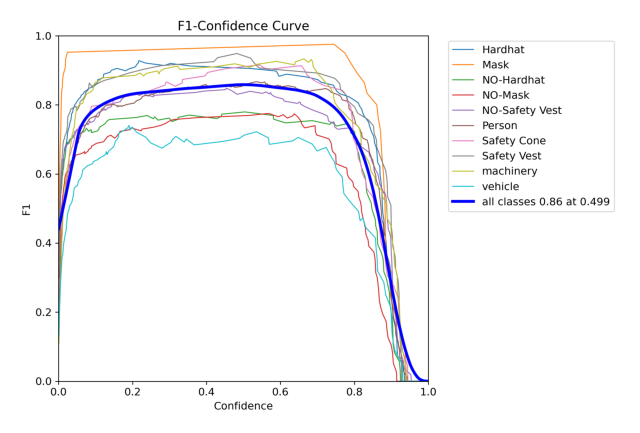


/kaggle/working/ppe_detection/yolov8s_v1/BoxPR_curve.png


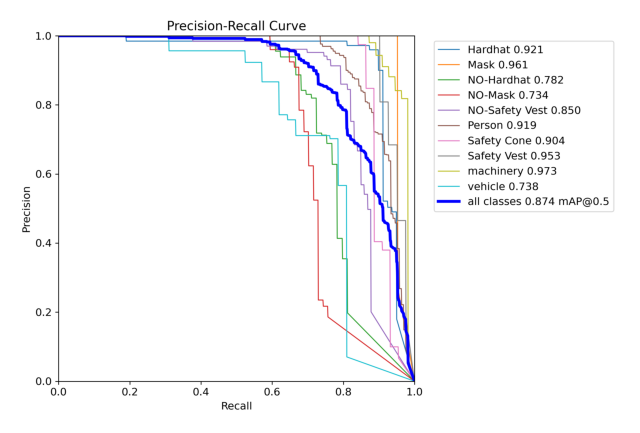


/kaggle/working/ppe_detection/yolov8s_v1/BoxP_curve.png


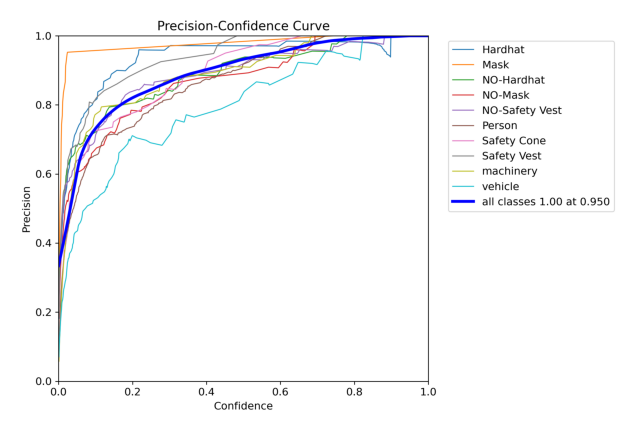


/kaggle/working/ppe_detection/yolov8s_v1/BoxR_curve.png


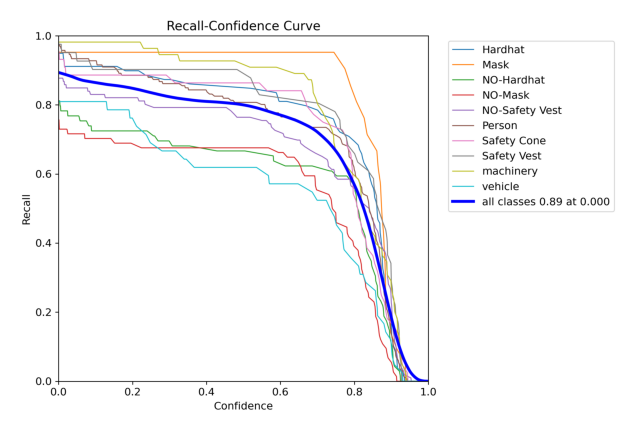


/kaggle/working/ppe_detection/yolov8s_v1/confusion_matrix.png


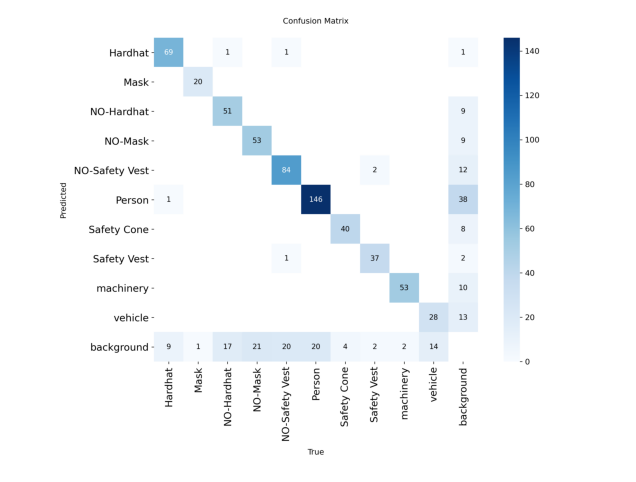


/kaggle/working/ppe_detection/yolov8s_v1/confusion_matrix_normalized.png


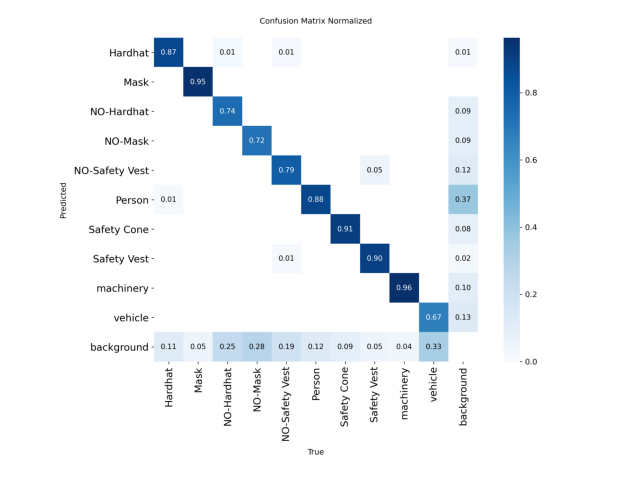


/kaggle/working/ppe_detection/yolov8s_v1/labels.jpg


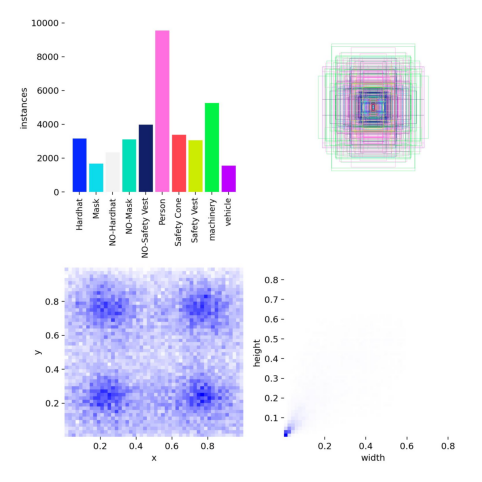


/kaggle/working/ppe_detection/yolov8s_v1/labels_correlogram.jpg


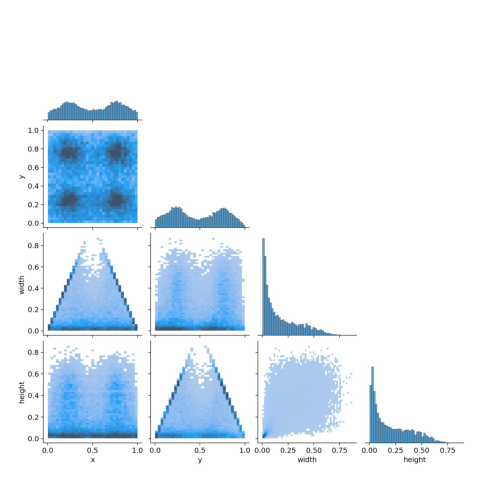


/kaggle/working/ppe_detection/yolov8s_v1/results.png


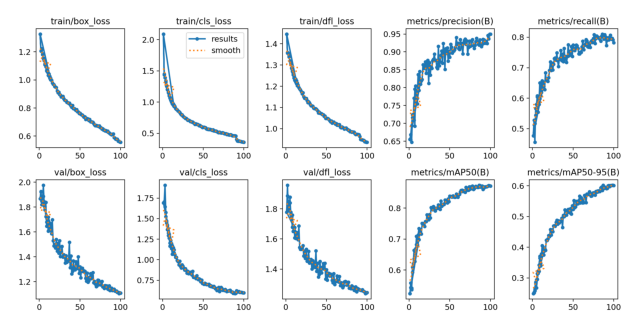

In [5]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to your YOLOv8 run folder
run_dir = "/kaggle/working/ppe_detection/yolov8s_v1"

# Collect result image paths (exclude train_batch/val_batch)
results_paths = [
    i for i in
    glob.glob(f"{run_dir}/*.png") +
    glob.glob(f"{run_dir}/*.jpg")
    if 'batch' not in os.path.basename(i)
]

# Helper function to display an image
def display_image(path, print_info=True, hide_axis=True):
    img = mpimg.imread(path)
    plt.figure(figsize=(8, 6))
    if hide_axis:
        plt.axis('off')
    plt.imshow(img)
    if print_info:
        print(f"Showing: {path}")
    plt.show()

# Display all images one by one
for file in sorted(results_paths):
    print(f"\n{file}")
    display_image(file, print_info=False, hide_axis=True)
